In [35]:

# import pandas as pd

# tickets = pd.read_csv("~/Desktop/Thesis/wrong_chats/new_labelled_data.csv")

# tickets.head()

In [36]:
# nltk.download('punkt')
# nltk.download('snowball_data')
# pip install langdetect
# pip install transformers
# pip install torch
# pip install scipy
import pandas as pd

dataset_dir_path = "~/Desktop/Tickets"

contents23 = pd.read_csv(f"{dataset_dir_path}/2023/contents.csv")
tickets23 = pd.read_csv(f"{dataset_dir_path}/2023/tickets.csv")

contents22 = pd.read_csv(f"{dataset_dir_path}/2022/contents.csv",  on_bad_lines = 'skip')
tickets22 = pd.read_csv(f"{dataset_dir_path}/2022/tickets.csv")

# Labels for these datasets older than 2022 in external csv file
# Fixing all the different labels and column names

labelsPre21 = pd.read_csv(f"{dataset_dir_path}/ticket_labels_JSc.csv")
labelsPre21['ID'] = pd.to_numeric(labelsPre21['ID'], errors = 'coerce')

labelsPre21['support_level'] = labelsPre21['support_level'].replace('2nd Level', '2. Level')
labelsPre21['support_level'] = labelsPre21['support_level'].replace('1st Level', '1. Level')

labelsPre21['department'] = labelsPre21['department'].replace('Application', 'Applikation ')
labelsPre21['department'] = labelsPre21['department'].replace('Contract', 'Vertrag')

labelsPre21['product'] = labelsPre21['product'].replace('Entwicklungssystem/Mandant', 'Entwicklungssystem bzw. Mandant ')
labelsPre21['product'] = labelsPre21['product'].replace('Business by Design', 'Business By Design ')


# Loading further Datasets pre 2022

contents21 = pd.read_csv(f"{dataset_dir_path}/2021/contents.csv")
tickets21 = pd.read_csv(f"{dataset_dir_path}/2021/tickets.csv")

contents20 = pd.read_csv(f"{dataset_dir_path}/2020/contents.csv")
tickets20 = pd.read_csv(f"{dataset_dir_path}/2020/tickets.csv")

contents19 = pd.read_csv(f"{dataset_dir_path}/2019/contents.csv")
tickets19 = pd.read_csv(f"{dataset_dir_path}/2019/tickets.csv")

contents18 = pd.read_csv(f"{dataset_dir_path}/2018/contents.csv")
tickets18 = pd.read_csv(f"{dataset_dir_path}/2018/tickets.csv")

contents17 = pd.read_csv(f"{dataset_dir_path}/2017/contents.csv")
tickets17 = pd.read_csv(f"{dataset_dir_path}/2017/tickets.csv")

contents16 = pd.read_csv(f"{dataset_dir_path}/2016/contents.csv")
tickets16 = pd.read_csv(f"{dataset_dir_path}/2016/tickets.csv")

contents15 = pd.read_csv(f"{dataset_dir_path}/2015/contents.csv")
tickets15 = pd.read_csv(f"{dataset_dir_path}/2015/tickets.csv")

merged_df = pd.merge(tickets21, labelsPre21, on = 'ID', how = 'left')

# Replace the values in 'Ticket Label', 'Abteilung Label', and 'Produkt Label'
tickets21['Ticket Label'] = merged_df['support_level']
tickets21['Abteilung Label'] = merged_df['department']
tickets21['Produkt Label'] = merged_df['product']


merged_df = pd.merge(tickets20, labelsPre21, on = 'ID', how = 'left')

# Replace the values in 'Ticket Label', 'Abteilung Label', and 'Produkt Label'
tickets20['Ticket Label'] = merged_df['support_level']
tickets20['Abteilung Label'] = merged_df['department']
tickets20['Produkt Label'] = merged_df['product']

merged_df = pd.merge(tickets19, labelsPre21, on = 'ID', how = 'left')

# Replace the values in 'Ticket Label', 'Abteilung Label', and 'Produkt Label'
tickets19['Ticket Label'] = merged_df['support_level']
tickets19['Abteilung Label'] = merged_df['department']
tickets19['Produkt Label'] = merged_df['product']

merged_df = pd.merge(tickets18, labelsPre21, on = 'ID', how = 'left')

# Replace the values in 'Ticket Label', 'Abteilung Label', and 'Produkt Label'
tickets18['Ticket Label'] = merged_df['support_level']
tickets18['Abteilung Label'] = merged_df['department']
tickets18['Produkt Label'] = merged_df['product']

merged_df = pd.merge(tickets17, labelsPre21, on = 'ID', how = 'left')

# Replace the values in 'Ticket Label', 'Abteilung Label', and 'Produkt Label'
tickets17['Ticket Label'] = merged_df['support_level']
tickets17['Abteilung Label'] = merged_df['department']
tickets17['Produkt Label'] = merged_df['product']

merged_df = pd.merge(tickets16, labelsPre21, on = 'ID', how = 'left')

# Replace the values in 'Ticket Label', 'Abteilung Label', and 'Produkt Label'
tickets16['Ticket Label'] = merged_df['support_level']
tickets16['Abteilung Label'] = merged_df['department']
tickets16['Produkt Label'] = merged_df['product']

merged_df = pd.merge(tickets15, labelsPre21, on = 'ID', how = 'left')

# Replace the values in 'Ticket Label', 'Abteilung Label', and 'Produkt Label'
tickets15['Ticket Label'] = merged_df['support_level']
tickets15['Abteilung Label'] = merged_df['department']
tickets15['Produkt Label'] = merged_df['product']


# Combining all Datatsets after converting pre 22 into 22/23 format
contentsComb = pd.concat([contents23, contents22, contents21, contents20, contents19, contents18, contents17, contents16, contents15], ignore_index = True)
ticketsComb = pd.concat([tickets23, tickets22, tickets21, tickets20, tickets19, tickets18, tickets17, tickets16, tickets15], ignore_index = True)

ticketsComb = ticketsComb[ticketsComb['Ticket Label'] != 'Not relevant']

ticketsComb['Ticket Label'] = ticketsComb['Ticket Label'].str.strip()
ticketsComb['Abteilung Label'] = ticketsComb['Abteilung Label'].str.strip()
ticketsComb['Produkt Label'] = ticketsComb['Produkt Label'].str.strip()

ticketsComb.fillna('', inplace = True)

ticketsComb.drop_duplicates('ID')
ticketsComb.count()

ID                    14616
Beschreibung          14616
Kategorie ID          14616
Kategorietext         14616
Unterkategorie ID     14616
Unterkategorietext    14616
Ticket Label          14616
Abteilung Label       14616
Produkt Label         14616
Priorität             14616
Status                14616
Angelegt Am           14616
Angelegt Von          14616
Geändert Am           14616
Geändert Von          14616
Auftraggeber          14616
Meldender             14616
Support Team          14616
Bearbeiter            14616
Erste Nachricht       14616
Letzte Nachricht      14616
dtype: int64

In [37]:
import re
# Combine 'Date' and 'Time' columns into a single 'Timestamp' column
contentsComb['Timestamp'] = pd.to_datetime(contentsComb['Datum'] + ' ' + contentsComb['Uhrzeit'])

# Sort the DataFrame by 'Timestamp' within each group of 'ID' and keep the first entry
onlyfmComb = contentsComb.sort_values(by = 'Timestamp').groupby('ID').first().reset_index()

# Get rid of disturbing line breaks
onlyfmComb['Text'] = onlyfmComb['Text'].replace("\n", " ")

# Regular expression to remove line breaks connected with previous or next words
def remove_melted_line_breaks(text):
    return re.sub(r'\r?\n|\r', ' ', text)

onlyfmComb['Text'] = onlyfmComb['Text'].apply(remove_melted_line_breaks)
# onlyfmComb.iloc[12]['Text']

In [38]:
# Remove rows where both 'Ticket Label' and 'Abteilung Label' are empty
condition = (ticketsComb['Ticket Label'].str.strip() != '') | (ticketsComb['Abteilung Label'].str.strip() != '')
tickets_clean = ticketsComb[condition]


tickets_clean.count()
#onlyfmComb.count()

ID                    8142
Beschreibung          8142
Kategorie ID          8142
Kategorietext         8142
Unterkategorie ID     8142
Unterkategorietext    8142
Ticket Label          8142
Abteilung Label       8142
Produkt Label         8142
Priorität             8142
Status                8142
Angelegt Am           8142
Angelegt Von          8142
Geändert Am           8142
Geändert Von          8142
Auftraggeber          8142
Meldender             8142
Support Team          8142
Bearbeiter            8142
Erste Nachricht       8142
Letzte Nachricht      8142
dtype: int64

In [39]:
# Combine Tickets and Contents into one big data frame
ticketALL = pd.merge(onlyfmComb, tickets_clean, on = 'ID', how = 'right')

# Replace empty values with empty strings
ticketALL['Text'] = ticketALL['Text'].fillna('')
#ticketALL.count()

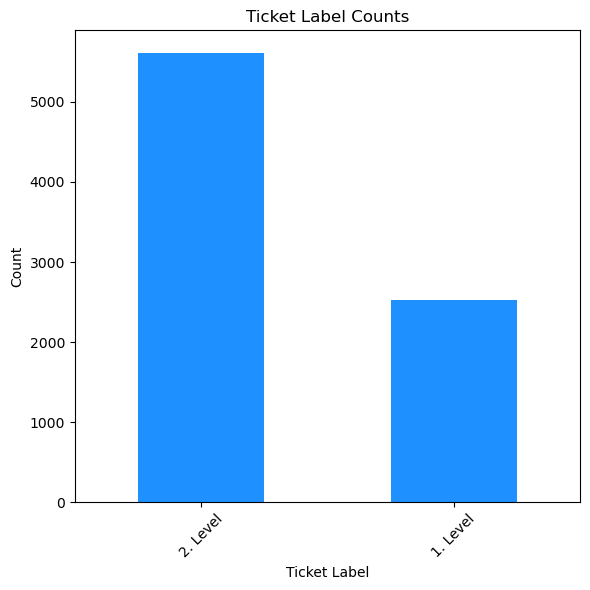

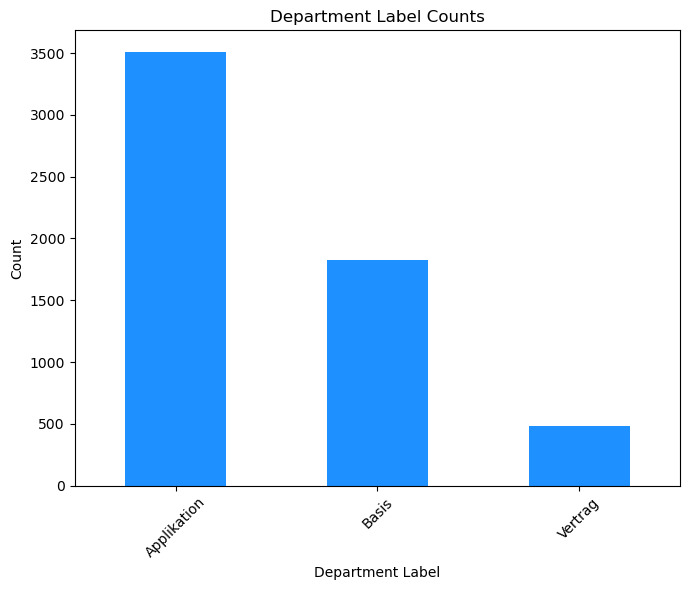

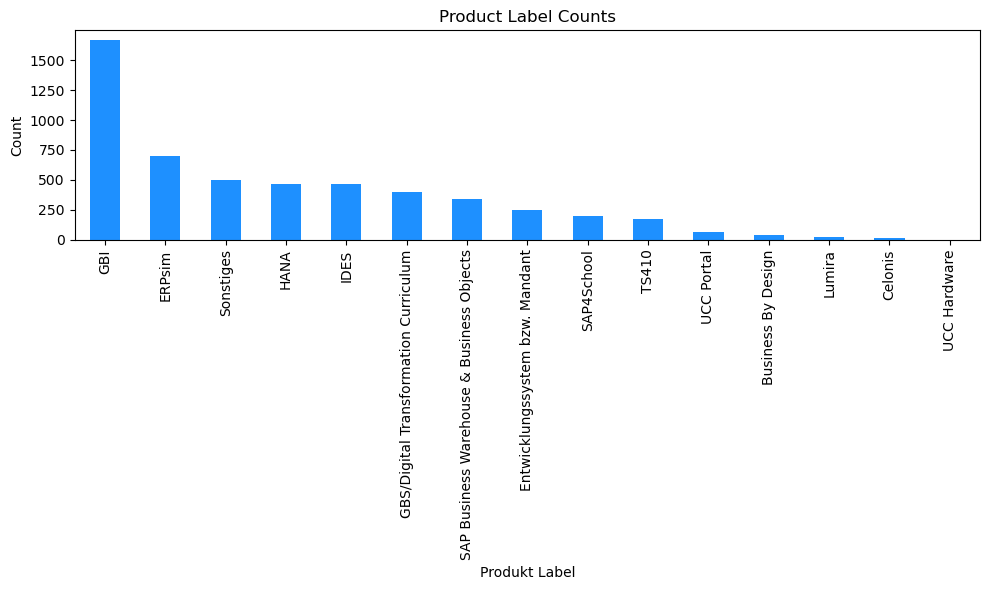

Ticket Label
2. Level    5610
1. Level    2532
Name: count, dtype: int64
Abteilung Label
Applikation    3509
Basis          1826
Vertrag         483
Name: count, dtype: int64
Produkt Label
GBI                                          1666
ERPsim                                        697
Sonstiges                                     502
HANA                                          467
IDES                                          466
GBS/Digital Transformation Curriculum         395
SAP Business Warehouse & Business Objects     343
Entwicklungssystem bzw. Mandant               248
SAP4School                                    201
TS410                                         176
UCC Portal                                     67
Business By Design                             41
Lumira                                         24
Celonis                                        12
UCC Hardware                                    1
Name: count, dtype: int64


In [40]:
import matplotlib.pyplot as plt

# First try of class reduction:
# Merging 'Celonis', 'Lumira', 'UCC Hardware', and 'UCC Portal' with 'Legacy'
    # ticketALL['Produkt Label'].replace(['Celonis', 'Lumira'], 'Legacy', inplace = True)
    # ticketALL['Produkt Label'].replace(['UCC Hardware', 'UCC Portal'], 'UCC Products', inplace = True)
    # Nearly no impact as categories have nothing in common and herefore could not be classified correctly

# Second try of class reduction: 
# Removing legacy produtcs entirely
    # , 'Celonis', 'Lumira', 'UCC Portal'
    #ticketALL = ticketALL[~ticketALL['Produkt Label'].isin(['UCC Hardware', 'Celonis', 'Lumira', 'UCC Portal', 'Business By Design'])]

# Third try of class reduction:
# Adding all legacy products to 'Sonstiges' as missclassification is high between those two:
    # ticketALL['Produkt Label'].replace(['UCC Hardware', 'Celonis', 'Lumira', 'UCC Portal', 'Business By Design'], 'Sonstiges', inplace = True)

# Fourth try of class reduction:
# Merging all global bike products into a new label 'global bike' as missclassification is highest between those two:
    #ticketALL['Produkt Label'].replace(['GBI', 'GBS/Digital Transformation Curriculum'], 'global bike', inplace = True)
    #ticketALL['Produkt Label'].replace(['UCC Hardware', 'Celonis', 'Lumira', 'UCC Portal'], 'Sonstiges', inplace = True)
    #ticketALL = ticketALL[~ticketALL['Produkt Label'].isin(['UCC Hardware', 'Celonis', 'Lumira', 'UCC Portal'])]

# Distribution of ticket labels
label_percentages = ticketALL['Ticket Label'].value_counts(normalize = True) * 100
department_percentages = ticketALL['Abteilung Label'][ticketALL['Abteilung Label'] != ''].value_counts(normalize = True) * 100
produkt_percentages = ticketALL['Produkt Label'][ticketALL['Produkt Label'] != ''].value_counts(normalize = True) * 100

# Plotting ticket label counts
label_counts = ticketALL['Ticket Label'].value_counts()
plt.figure(figsize = (6, 6))
label_counts.plot(kind = 'bar', color = '#1E90FF')
plt.title('Ticket Label Counts')
plt.xlabel('Ticket Label')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.tight_layout()
#plt.savefig('ticket_label.jpg', format = 'jpg', dpi = 300)
plt.show()

# Plotting department label counts
department_counts = ticketALL['Abteilung Label'].loc[ticketALL['Abteilung Label'] != ''].value_counts()
plt.figure(figsize = (7, 6))
department_counts.plot(kind = 'bar', color = '#1E90FF')
plt.title('Department Label Counts')
plt.xlabel('Department Label')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.tight_layout()
#plt.savefig('abteilung_label.jpg', format = 'jpg', dpi = 300)
plt.show()


# Plotting product label counts
produkt_counts = ticketALL['Produkt Label'].loc[ticketALL['Produkt Label'] != ''].value_counts()
plt.figure(figsize = (10, 6))
produkt_counts.plot(kind = 'bar', color = '#1E90FF')
plt.title('Product Label Counts')
plt.xlabel('Produkt Label')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.tight_layout()
#plt.savefig('produkt_label.jpg', format='jpg', dpi = 300)
plt.show()

print(label_counts)
print(department_counts)
print(produkt_counts)

In [41]:
# How much tickets are left when class reducing
ticketALL.count()

# Average length of natural language columns 
average_length_text = ticketALL['Text'].apply(len).mean()
average_length_descr = ticketALL['Beschreibung'].apply(len).mean()

print("Average length 'Text' Column: ", average_length_text)
print("Average length 'Description' Column: ", average_length_descr)

Average length 'Text' Column:  1167.2076885286172
Average length 'Description' Column:  27.31159420289855


In [42]:
from langdetect import detect

def language_detect(text):
    try:
        return detect(text)
    except:
        return 'unknown'

# Langage detection to the 'Text' column
ticketALL['Sprache'] = ticketALL['Text'].apply(language_detect)

# Language detection with fallback column (focus on 'Text' column as it is mostly longer)
def language_detect_with_fallback(row):
    
    language = row['Sprache']
    fallback_text = row['Beschreibung']
    
    if language == 'unknown':
        detected_language = language_detect(fallback_text)
        
        if detected_language in ['en', 'de']:
            return detected_language
        else:
            return 'de' 
    else:
        if language in ['en', 'de']:
            return language
        else:
            return 'de'

ticketALL['Sprache'] = ticketALL.apply(language_detect_with_fallback, axis = 1)

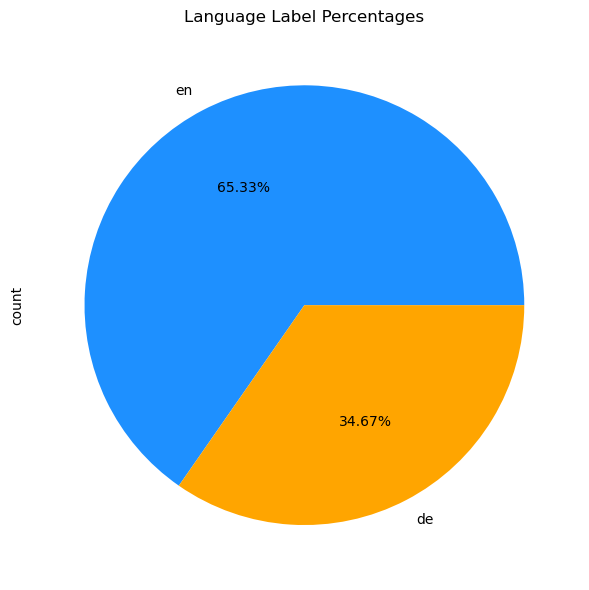

         Count  Percentage
Sprache                   
en        5319   65.327929
de        2823   34.672071


In [43]:
# Count the occurrences of each language in the specified column
language_counts = ticketALL['Sprache'].value_counts()

# Total count of languages
total_count = len(ticketALL['Sprache'])

# Percentage of each language
language_percentages = (language_counts / total_count) * 100

# Display the results
language_df = pd.DataFrame({'Count': language_counts, 'Percentage': language_percentages})


# Plotting language counts
plt.figure(figsize = (6, 6))
language_percentages.plot(kind = 'pie', colors = ['#1E90FF', 'orange'], autopct = '%.2f%%')
plt.title('Language Label Percentages')
plt.tight_layout()
#plt.savefig('languages_pie.jpg', format = 'jpg', dpi = 300)
plt.show()
print(language_df)

In [44]:
# Testing the language detection
filtered_df = ticketALL[ticketALL['Sprache'].isin(['en'])]
filtered_df.head()

,ID,Nachrichtentyp,Datum,Uhrzeit,Absender,Ort,Text,Timestamp,Beschreibung,Kategorie ID,...,Angelegt Von,Geändert Am,Geändert Von,Auftraggeber,Meldender,Support Team,Bearbeiter,Erste Nachricht,Letzte Nachricht,Sprache
1,2000013989,Beschreibung,2023.01.04,14:37:50,H2851US4 UCC Support,D-85748 Garching,"Dear Philipp, Happy New Year! Can you please...",2023-01-04 14:37:50,erpsim login info,ZSD_SR_SIM,...,H2851US4,2023.01.24\t18:00:07,BORYS,U2GB003 University of Warwick,U2GB003MM1 Herr Mohammad Moeini-Aghkariz,0000000047 APP Applikation,H2851US4 Herr UCC Support,2023.01.04\t14:37:50,2023.01.24\t18:00:07,en
2,2000013990,Beschreibung,2023.01.05,18:17:10,U2GB020KJ2 Kathryn James,G-PO1 3DE Portsmouth,"Please could you send the url, access details ...",2023-01-05 18:17:10,Access details required,ZSD_SR_HANA,...,U2GB020KJ2,2023.02.02\t18:00:19,BORYS,U2GB020 University of Portsmouth,U2GB020KJ2 Frau Kathryn James,0000000047 APP Applikation,H2851CD1 Herr Clemens Drieschner,2023.01.05\t18:17:10,2023.02.02\t18:00:19,en
3,2000013991,Beschreibung,2023.01.06,00:59:27,U2AU002SB1 Scott Bingley,A-3000 Melbourne,"Hi Team, HCMC University of Technology, Facul...",2023-01-06 00:59:27,New contract for HCMCUT,ZSD_SR_KTV,...,U2AU002SB1,2023.01.17\t09:30:54,H2851PL1,U2AU002 ACC Melbourne Victoria University Busi...,U2AU002SB1 Herr Scott Bingley,0000000047 APP Applikation,H2851PL1 Herr Philipp Landler,2023.01.06\t00:59:27,2023.01.10\t01:44:48,en
5,2000013993,Systemdaten,2023.01.09,11:43:27,H2851US4 UCC Support,D-85748 Garching,SY-SYSID ............... BW1 SY-MANDT ...........,2023-01-09 11:43:27,Fwd: Wtrlt: Produktauslieferung und Zuga,ZSD_SR_BW,...,H2851US4,2023.01.10\t16:20:14,H2361FK1,H2361 Hochschule Fulda,H2361FK1 Herr Frank Klingert,0000000047 APP Applikation,H2851CD1 Herr Clemens Drieschner,2023.01.09\t11:43:27,2023.01.09\t14:21:33,en
8,2000013996,Beschreibung,2023.01.11,12:16:46,U2IL022NZ1 Nechama Zahn,I-9547247 Jerusalem,Hi Tomorrow Thursday 12/1/23 at 13:45-17:00 we...,2023-01-11 12:16:46,Ugent! SAP Test,ZSD_SR_GUI,...,U2IL022NZ1,2023.01.31\t18:00:07,BORYS,U2IL022 Beit Yaakov Seminary Directors Associa...,U2IL022NZ1 Frau Nechama Zahn,0000000046 BAS Basis,H2851JR2 Herr Johannes Rank,2023.01.11\t12:16:46,2023.01.31\t18:00:07,en


In [45]:
# Cleaning of for now useless Columns
columns_to_remove = ['Ort', 'Kategorietext', 'Unterkategorietext', 'Status', 'Angelegt Am' ,'Angelegt Von', 'Geändert Am', 'Geändert Von', 'Auftraggeber', 'Meldender', 'Support Team', 'Bearbeiter', 'Erste Nachricht', 'Letzte Nachricht',
                     'Nachrichtentyp', 'Datum', 'Uhrzeit', 'Absender', 'Priorität']

for column in columns_to_remove:
    del ticketALL[column]

In [46]:
# Actual NLP step by step
# 1. Converting 'Text' and 'Description' to lower case

ticketALL['Text'] = ticketALL['Text'].str.lower()
ticketALL['Beschreibung'] = ticketALL['Beschreibung'].str.lower()

# 2. Removing special charcters and links

def remove_special_characters(text): 
    return re.sub(r'[^A-Za-z0-9\säöüßÄÖÜ]', '', text)

def remove_links(text):
    return re.sub(r'http\S+|www.\S+', '', text)


# Applying it to the "natural language"-Columns
ticketALL['Text'] = ticketALL['Text'].apply(remove_special_characters)
ticketALL['Text'] = ticketALL['Text'].apply(remove_links)

ticketALL['Beschreibung'] = ticketALL['Beschreibung'].apply(remove_special_characters)
ticketALL['Beschreibung'] = ticketALL['Beschreibung'].apply(remove_links)

ticketALL.head()

,ID,Text,Timestamp,Beschreibung,Kategorie ID,Unterkategorie ID,Ticket Label,Abteilung Label,Produkt Label,Sprache
0,2000013988,hallo wir haben nächste woche einen sap bw ku...,2023-01-03 16:28:53,kurs vorbereiten,ZSD_SR_BW,ZSD_SR_BW_SON,2. Level,Applikation,SAP Business Warehouse & Business Objects,de
1,2000013989,dear philipp happy new year can you please h...,2023-01-04 14:37:50,erpsim login info,ZSD_SR_SIM,ZSD_SR_SIM_SON,1. Level,,,en
2,2000013990,please could you send the url access details a...,2023-01-05 18:17:10,access details required,ZSD_SR_HANA,ZSD_SR_HANA_SE,2. Level,Applikation,HANA,en
3,2000013991,hi team hcmc university of technology faculty...,2023-01-06 00:59:27,new contract for hcmcut,ZSD_SR_KTV,,2. Level,Applikation,Sonstiges,en
4,2000013992,hallo mit studentenaccounts erscheint beim auf...,2023-01-07 14:44:08,freischaltung der ipadressen,ZSD_SR_SOLM,ZSD_SR_SOLM_IPF,1. Level,Applikation,UCC Portal,de


In [47]:
# 3. Tokenization 
import spacy

# Load spaCy language models
spacy_en = spacy.load("en_core_web_sm")
spacy_de = spacy.load("de_core_news_sm")

# Tokenize 'Beschreibung' based on the language label
def tokenize_text_beschreibung(row):
    language = row['Sprache']
    text = row['Beschreibung']
    if language == 'en':
        return_text = spacy_en(text)
    elif language == 'de':
        return_text = spacy_de(text)
    else:
        return_text = None  
    return return_text

# Tokenize 'Text' based on the language label
def tokenize_text_text(row):
    language = row['Sprache']
    text = row['Text']
    if language == 'en':
        return_text = spacy_en(text)
    elif language == 'de':
        return_text = spacy_de(text)
    else:
        return_text = None  
    return return_text


# Tokenizing based on language label
ticketALL['tokenized_beschreibung'] = ticketALL.apply(tokenize_text_beschreibung, axis = 1)
ticketALL['tokenized_text'] = ticketALL.apply(tokenize_text_text, axis = 1)

ticketALL.head()

,ID,Text,Timestamp,Beschreibung,Kategorie ID,Unterkategorie ID,Ticket Label,Abteilung Label,Produkt Label,Sprache,tokenized_beschreibung,tokenized_text
0,2000013988,hallo wir haben nächste woche einen sap bw ku...,2023-01-03 16:28:53,kurs vorbereiten,ZSD_SR_BW,ZSD_SR_BW_SON,2. Level,Applikation,SAP Business Warehouse & Business Objects,de,"(kurs, vorbereiten)","(hallo, , wir, haben, nächste, woche, einen, ..."
1,2000013989,dear philipp happy new year can you please h...,2023-01-04 14:37:50,erpsim login info,ZSD_SR_SIM,ZSD_SR_SIM_SON,1. Level,,,en,"(erpsim, login, info)","(dear, philipp, , happy, new, year, , can, y..."
2,2000013990,please could you send the url access details a...,2023-01-05 18:17:10,access details required,ZSD_SR_HANA,ZSD_SR_HANA_SE,2. Level,Applikation,HANA,en,"(access, details, required)","(please, could, you, send, the, url, access, d..."
3,2000013991,hi team hcmc university of technology faculty...,2023-01-06 00:59:27,new contract for hcmcut,ZSD_SR_KTV,,2. Level,Applikation,Sonstiges,en,"(new, contract, for, hcmcut)","(hi, team, , hcmc, university, of, technology..."
4,2000013992,hallo mit studentenaccounts erscheint beim auf...,2023-01-07 14:44:08,freischaltung der ipadressen,ZSD_SR_SOLM,ZSD_SR_SOLM_IPF,1. Level,Applikation,UCC Portal,de,"(freischaltung, der, ipadressen)","(hallo, mit, studentenaccounts, erscheint, bei..."


In [48]:
# 4. Removal of stop words

# Remove stop words based on language
def remove_stop_words_by_language(text, language):
    if language == 'en':
        language_model = spacy_en
    elif language == 'de':
        language_model = spacy_de
    else:
        language_model = None

    if language_model:
        edited_text = language_model(text)
        tokens_without_stopwords = [token.text for token in edited_text if not token.is_stop]
        return ' '.join(tokens_without_stopwords)
    else:
        return text  


# Applying the function to the DataFrame ('Text', 'Beschreibung')
ticketALL['filtered_text'] = ticketALL.apply(lambda row: remove_stop_words_by_language(row['tokenized_text'], row['Sprache']), axis = 1)
ticketALL['filtered_beschreibung'] = ticketALL.apply(lambda row: remove_stop_words_by_language(row['tokenized_beschreibung'], row['Sprache']), axis = 1)

# ticketALL.head()
#empty_string_rows = ticketALL[ticketALL['Text'] == '']
#empty_string_rows.head()
english_rows = ticketALL[ticketALL['Sprache'] == 'de']
english_rows.head()

,ID,Text,Timestamp,Beschreibung,Kategorie ID,Unterkategorie ID,Ticket Label,Abteilung Label,Produkt Label,Sprache,tokenized_beschreibung,tokenized_text,filtered_text,filtered_beschreibung
0,2000013988,hallo wir haben nächste woche einen sap bw ku...,2023-01-03 16:28:53,kurs vorbereiten,ZSD_SR_BW,ZSD_SR_BW_SON,2. Level,Applikation,SAP Business Warehouse & Business Objects,de,"(kurs, vorbereiten)","(hallo, , wir, haben, nächste, woche, einen, ...",hallo nächste woche sap bw kurs bitte 16 stu...,kurs vorbereiten
4,2000013992,hallo mit studentenaccounts erscheint beim auf...,2023-01-07 14:44:08,freischaltung der ipadressen,ZSD_SR_SOLM,ZSD_SR_SOLM_IPF,1. Level,Applikation,UCC Portal,de,"(freischaltung, der, ipadressen)","(hallo, mit, studentenaccounts, erscheint, bei...",hallo studentenaccounts erscheint aufruf custo...,freischaltung ipadressen
6,2000013994,sehr geehrte damen und herren anbei erhalten ...,2023-01-09 14:19:45,ts410 kursanmeldung,ZSD_SR_TERP,ZSD_SR_TERP_ANF,2. Level,Applikation,TS410,de,"(ts410, kursanmeldung)","(sehr, geehrte, damen, und, herren, , anbei, ...",geehrte damen herren anbei erhalten kursanme...,ts410 kursanmeldung
7,2000013995,hallo sophie das ticket habe ich aus einer ma...,2023-01-10 14:36:44,testzugang verlängerung,ZSD_SR_S4HANA,ZSD_SR_S4HANA_AA,2. Level,Applikation,GBI,de,"(testzugang, verlängerung)","(hallo, sophie, , das, ticket, habe, ich, aus...",hallo sophie ticket mail übertragen herrn yi...,testzugang verlängerung
12,2000014000,hallo ich habe das system bisher immer mit de...,2023-01-12 12:17:57,fiori launchpad,ZSD_SR_S4HANA,ZSD_SR_S4HANA_SON,1. Level,Applikation,UCC Portal,de,"(fiori, launchpad)","(hallo, , ich, habe, das, system, bisher, imm...",hallo system sapgui benutzt hinblick zukün...,fiori launchpad


In [49]:
# 5. Stemming of the tokens
import nltk
from nltk.stem import PorterStemmer, SnowballStemmer

# Initializing of stemmers
german_stemmer = SnowballStemmer("german")
# I could not get cistem stemmer running on M2 mac -> default to porter
english_stemmer = PorterStemmer()

# Stemming the #Text' column
def stem_text(row):
    if row['Sprache'] == 'en':
        return ' '.join([english_stemmer.stem(word) for word in row['filtered_text'].split()])
    elif row['Sprache'] == 'de':
        return ' '.join([german_stemmer.stem(word) for word in row['filtered_text'].split()])
    return row['Text']

# Stemming the 'Beschreibung' column
def stem_beschreibung(row):
    if row['Sprache'] == 'en':
        return ' '.join([english_stemmer.stem(word) for word in row['filtered_beschreibung'].split()])
    elif row['Sprache'] == 'de':
        return ' '.join([german_stemmer.stem(word) for word in row['filtered_beschreibung'].split()])
    return row['Text']

# Applying the stemming-function to the text columns ('Text', 'Beschreibung')
ticketALL['stemmed_text'] = ticketALL.apply(stem_text, axis = 1)
ticketALL['stemmed_beschreibung'] = ticketALL.apply(stem_beschreibung, axis = 1)

ticketALL.head()

,ID,Text,Timestamp,Beschreibung,Kategorie ID,Unterkategorie ID,Ticket Label,Abteilung Label,Produkt Label,Sprache,tokenized_beschreibung,tokenized_text,filtered_text,filtered_beschreibung,stemmed_text,stemmed_beschreibung
0,2000013988,hallo wir haben nächste woche einen sap bw ku...,2023-01-03 16:28:53,kurs vorbereiten,ZSD_SR_BW,ZSD_SR_BW_SON,2. Level,Applikation,SAP Business Warehouse & Business Objects,de,"(kurs, vorbereiten)","(hallo, , wir, haben, nächste, woche, einen, ...",hallo nächste woche sap bw kurs bitte 16 stu...,kurs vorbereiten,hallo nach woch sap bw kur bitt 16 student use...,kur vorbereit
1,2000013989,dear philipp happy new year can you please h...,2023-01-04 14:37:50,erpsim login info,ZSD_SR_SIM,ZSD_SR_SIM_SON,1. Level,,,en,"(erpsim, login, info)","(dear, philipp, , happy, new, year, , can, y...",dear philipp happy new year help erpsim lo...,erpsim login info,dear philipp happi new year help erpsim login ...,erpsim login info
2,2000013990,please could you send the url access details a...,2023-01-05 18:17:10,access details required,ZSD_SR_HANA,ZSD_SR_HANA_SE,2. Level,Applikation,HANA,en,"(access, details, required)","(please, could, you, send, the, url, access, d...",send url access details instructions set user ...,access details required,send url access detail instruct set user accou...,access detail requir
3,2000013991,hi team hcmc university of technology faculty...,2023-01-06 00:59:27,new contract for hcmcut,ZSD_SR_KTV,,2. Level,Applikation,Sonstiges,en,"(new, contract, for, hcmcut)","(hi, team, , hcmc, university, of, technology...",hi team hcmc university technology faculty i...,new contract hcmcut,hi team hcmc univers technolog faculti industr...,new contract hcmcut
4,2000013992,hallo mit studentenaccounts erscheint beim auf...,2023-01-07 14:44:08,freischaltung der ipadressen,ZSD_SR_SOLM,ZSD_SR_SOLM_IPF,1. Level,Applikation,UCC Portal,de,"(freischaltung, der, ipadressen)","(hallo, mit, studentenaccounts, erscheint, bei...",hallo studentenaccounts erscheint aufruf custo...,freischaltung ipadressen,hallo studentenaccount erscheint aufruf custom...,freischalt ipadress


In [50]:
# 6a. Vectorization with Tfid encoding
from sklearn.model_selection import train_test_split
from scipy.sparse import hstack
from sklearn.feature_extraction.text import TfidfVectorizer

# Place for class reduction after preprocessing
ticketALL['Produkt Label (Merged)'] = ticketALL['Produkt Label'].replace(['GBI', 'GBS/Digital Transformation Curriculum'], 'global bike', inplace = False) # Merge GBS & GBI
# ticketALL['Produkt Label'].replace(['UCC Hardware', 'Celonis', 'Lumira', 'UCC Portal'], 'Sonstiges', inplace = True)
# 'UCC Hardware', 'Celonis', 'Lumira', 'UCC Portal', 'Business By Design'

categorical_columns = ['Kategorie ID', 'Unterkategorie ID']

# Filter out rows with empty strings
non_empty_rows = (ticketALL['Produkt Label (Merged)'] != '') & (ticketALL['Ticket Label'] == '2. Level')
filtered_data = ticketALL[non_empty_rows]

# Splitting data into training and testing sets BEFORE tfidf vectorization
X_train_raw = filtered_data[(['stemmed_text', 'stemmed_beschreibung'] + categorical_columns)]
X_test_raw = X_train_raw
y_train = filtered_data
y_test = y_train
# X_train_raw, X_test_raw, y_train, y_test = train_test_split(
#     filtered_data[['stemmed_text', 'stemmed_beschreibung'] + categorical_columns], # x
#     filtered_data['Produkt Label (Merged)', 'ID'], # y
#     test_size = 0.2,
#     random_state = 1)


# Tfidf vectorization for the training set
# TEXT column
tfidf_vectorizer_text = TfidfVectorizer(max_features = 30)
tfidf_matrix_text_train = tfidf_vectorizer_text.fit_transform(X_train_raw['stemmed_text'])
# DESCRIPTION column
tfidf_vectorizer_description = TfidfVectorizer(max_features = 30)
tfidf_matrix_description_train = tfidf_vectorizer_description.fit_transform(X_train_raw['stemmed_beschreibung'])
# Combine the Tfidf train-matrices horizontally
tfidf_matrix_combined_train = hstack((tfidf_matrix_text_train, tfidf_matrix_description_train))


# Tfidf vectorization for the testing set
# TEXT and DECRIPTION column
tfidf_matrix_text_test = tfidf_vectorizer_text.transform(X_test_raw['stemmed_text'])
tfidf_matrix_description_test = tfidf_vectorizer_description.transform(X_test_raw['stemmed_beschreibung'])
# Combine the Tfidf test-matrices horizontally
tfidf_matrix_combined_test = hstack((tfidf_matrix_text_test, tfidf_matrix_description_test))

In [51]:
# 6b. Combining categorical and text data 
from sklearn.preprocessing import OneHotEncoder
import scipy.sparse

# One-hot encoding for categorical data
encoder = OneHotEncoder(handle_unknown = 'ignore')
encoded_data_train = encoder.fit_transform(X_train_raw[categorical_columns]).toarray()
encoded_data_test = encoder.transform(X_test_raw[categorical_columns]).toarray()

# Convert the one-hot encoded arrays to sparse matrices
encoded_sparse_train = scipy.sparse.csr_matrix(encoded_data_train)
encoded_sparse_test = scipy.sparse.csr_matrix(encoded_data_test)

# Combine TF-IDF matrix and one hot encoded matrix horizontally for both training and testing sets
final_matrix_train = hstack((tfidf_matrix_combined_train, encoded_sparse_train))
final_matrix_test = hstack((tfidf_matrix_combined_test, encoded_sparse_test))

#print(final_matrix_train)

/tmp/ipykernel_9147/1381193272.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test_tot[f'{clf_name} Predictions'] = y_pred
/tmp/ipykernel_9147/1381193272.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test_tot['New Labels'] = y_test_tot.apply(merge_if_different, axis=1)


Metrics for RandomForestClassifier
Accuracy: 0.940906368536634
Precision: 0.9437431469598635
Recall: 0.940906368536634
F1-Score: 0.9407808461430234
Biggest error betwenen: 9 and 13


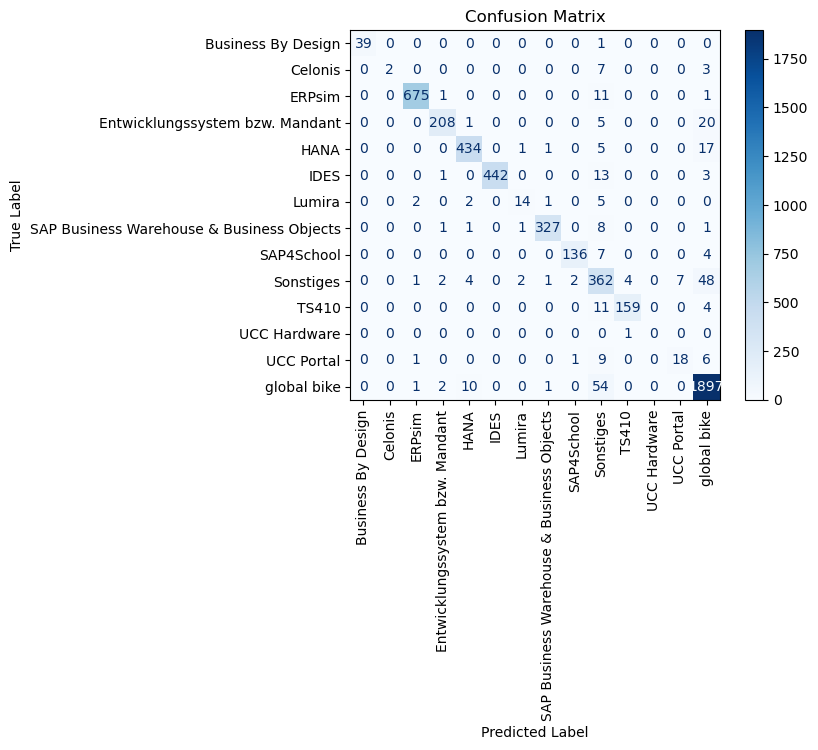

/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                           precision    recall  f1-score   support

                       Business By Design       1.00      0.97      0.99        40
                                  Celonis       1.00      0.17      0.29        12
                                   ERPsim       0.99      0.98      0.99       688
          Entwicklungssystem bzw. Mandant       0.97      0.89      0.93       234
                                     HANA       0.96      0.95      0.95       458
                                     IDES       1.00      0.96      0.98       459
                                   Lumira       0.78      0.58      0.67        24
SAP Business Warehouse & Business Objects       0.99      0.96      0.98       339
                               SAP4School       0.98      0.93      0.95       147
                                Sonstiges       0.73      0.84      0.78       433
                                    TS410       0.97      0.91      0.94       174
   

/tmp/ipykernel_9147/1381193272.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test_tot[f'{clf_name} Predictions'] = y_pred
/tmp/ipykernel_9147/1381193272.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test_tot['New Labels'] = y_test_tot.apply(merge_if_different, axis=1)


Metrics for SVC
Accuracy: 0.9097624276302655
Precision: 0.9142116888861958
Recall: 0.9097624276302655
F1-Score: 0.9091615245951712
Biggest error betwenen: 9 and 13


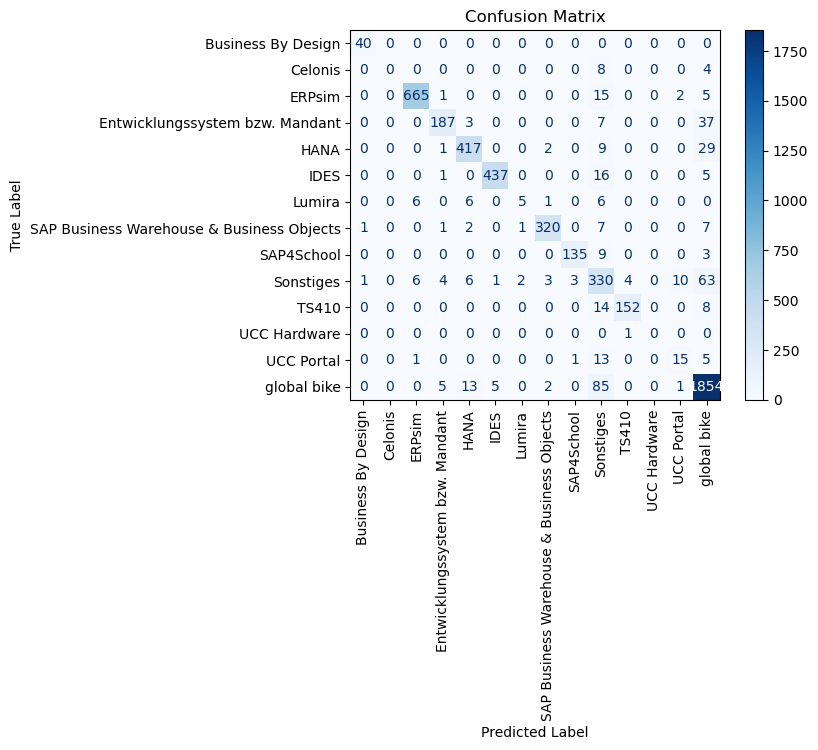

/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/tmp/ipykernel_9147/1381193272.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test_tot[f'{clf_name} Predictions'] = y_pred
/tmp/ipykernel_9147/1381193272.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

                                           precision    recall  f1-score   support

                       Business By Design       0.95      1.00      0.98        40
                                  Celonis       0.00      0.00      0.00        12
                                   ERPsim       0.98      0.97      0.97       688
          Entwicklungssystem bzw. Mandant       0.94      0.80      0.86       234
                                     HANA       0.93      0.91      0.92       458
                                     IDES       0.99      0.95      0.97       459
                                   Lumira       0.62      0.21      0.31        24
SAP Business Warehouse & Business Objects       0.98      0.94      0.96       339
                               SAP4School       0.97      0.92      0.94       147
                                Sonstiges       0.64      0.76      0.69       433
                                    TS410       0.97      0.87      0.92       174
   

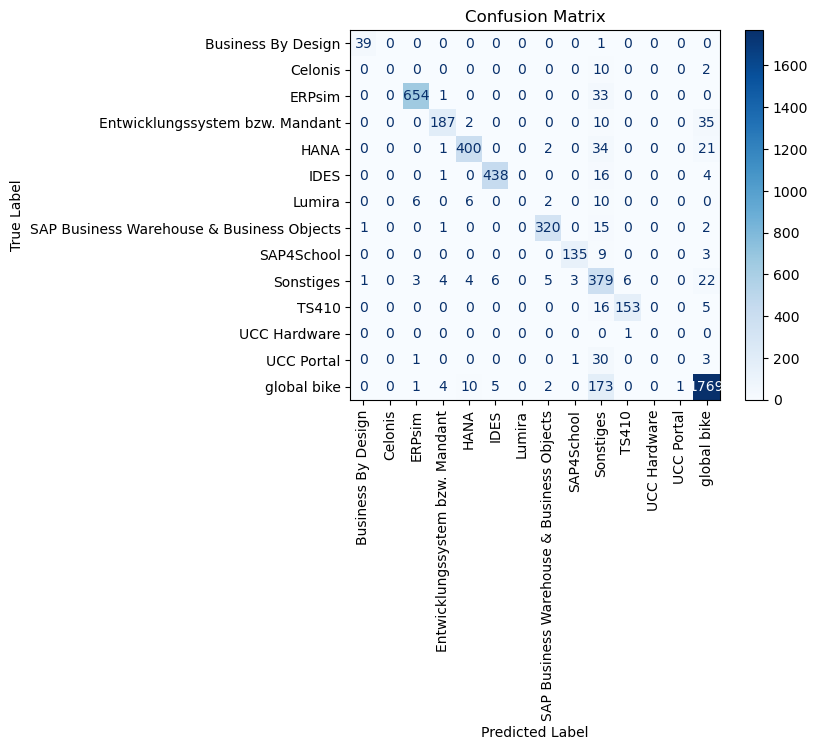

/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/tmp/ipykernel_9147/1381193272.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test_tot[f'{clf_name} Predictions'] = y_pred


                                           precision    recall  f1-score   support

                       Business By Design       0.95      0.97      0.96        40
                                  Celonis       0.00      0.00      0.00        12
                                   ERPsim       0.98      0.95      0.97       688
          Entwicklungssystem bzw. Mandant       0.94      0.80      0.86       234
                                     HANA       0.95      0.87      0.91       458
                                     IDES       0.98      0.95      0.96       459
                                   Lumira       0.00      0.00      0.00        24
SAP Business Warehouse & Business Objects       0.97      0.94      0.96       339
                               SAP4School       0.97      0.92      0.94       147
                                Sonstiges       0.51      0.88      0.65       433
                                    TS410       0.96      0.88      0.92       174
   

/tmp/ipykernel_9147/1381193272.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test_tot['New Labels'] = y_test_tot.apply(merge_if_different, axis=1)


Metrics for LogisticRegression
Accuracy: 0.9093631463365941
Precision: 0.9137270331994004
Recall: 0.9093631463365941
F1-Score: 0.9083013513590426
Biggest error betwenen: 9 and 13


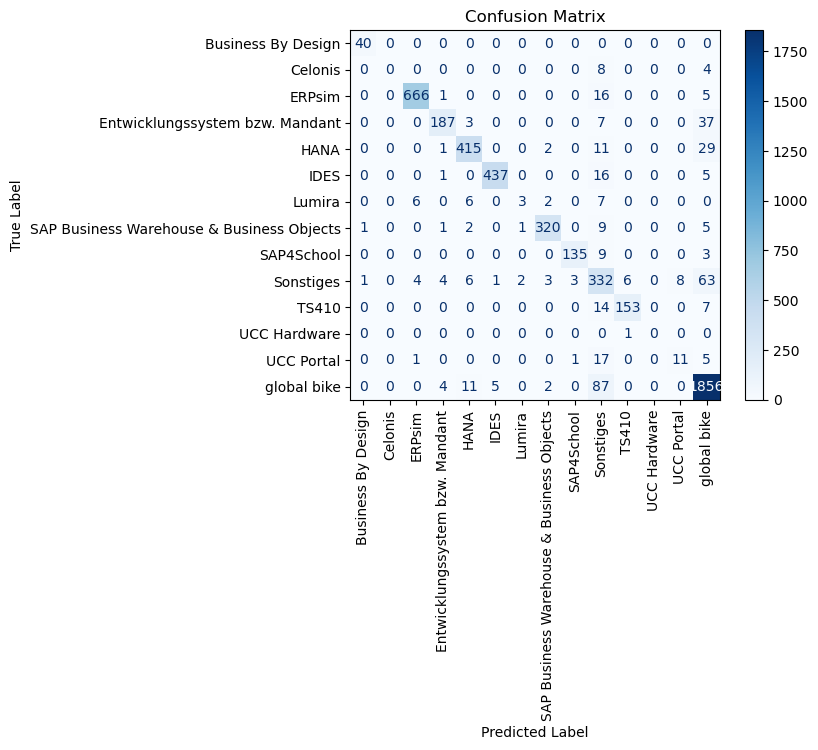

/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                           precision    recall  f1-score   support

                       Business By Design       0.95      1.00      0.98        40
                                  Celonis       0.00      0.00      0.00        12
                                   ERPsim       0.98      0.97      0.98       688
          Entwicklungssystem bzw. Mandant       0.94      0.80      0.86       234
                                     HANA       0.94      0.91      0.92       458
                                     IDES       0.99      0.95      0.97       459
                                   Lumira       0.50      0.12      0.20        24
SAP Business Warehouse & Business Objects       0.97      0.94      0.96       339
                               SAP4School       0.97      0.92      0.94       147
                                Sonstiges       0.62      0.77      0.69       433
                                    TS410       0.96      0.88      0.92       174
   

/tmp/ipykernel_9147/1381193272.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test_tot[f'{clf_name} Predictions'] = y_pred
/tmp/ipykernel_9147/1381193272.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test_tot['New Labels'] = y_test_tot.apply(merge_if_different, axis=1)


Metrics for KNeighborsClassifier
Accuracy: 0.8941904571770812
Precision: 0.8943899810590981
Recall: 0.8941904571770812
F1-Score: 0.8914779101050588
Biggest error betwenen: 9 and 13


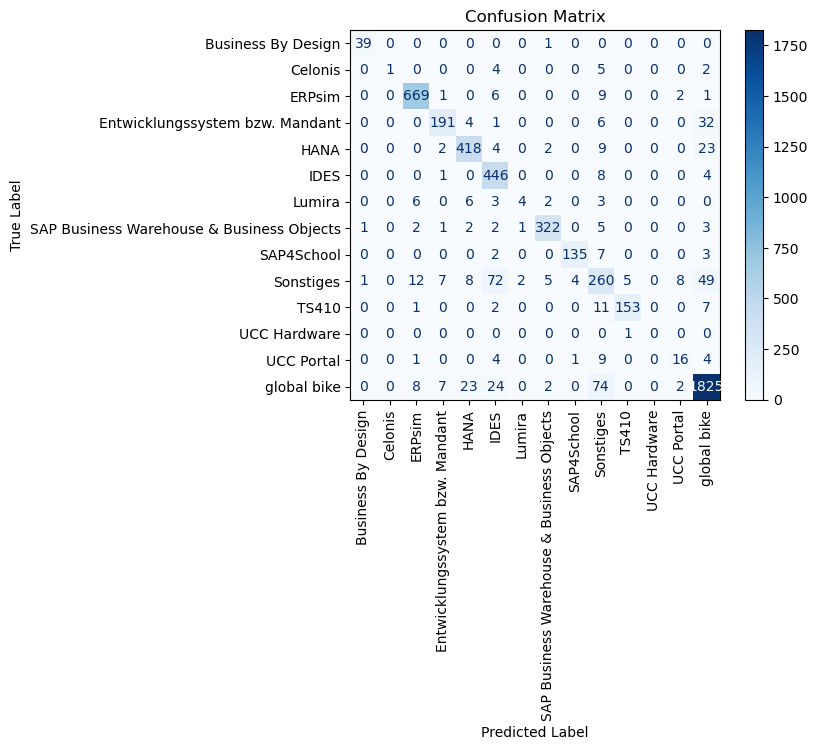

/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/tmp/ipykernel_9147/1381193272.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test_tot[f'{clf_name} Predictions'] = y_pred
/tmp/ipykernel_9147/1381193272.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

                                           precision    recall  f1-score   support

                       Business By Design       0.95      0.97      0.96        40
                                  Celonis       1.00      0.08      0.15        12
                                   ERPsim       0.96      0.97      0.96       688
          Entwicklungssystem bzw. Mandant       0.91      0.82      0.86       234
                                     HANA       0.91      0.91      0.91       458
                                     IDES       0.78      0.97      0.87       459
                                   Lumira       0.57      0.17      0.26        24
SAP Business Warehouse & Business Objects       0.96      0.95      0.96       339
                               SAP4School       0.96      0.92      0.94       147
                                Sonstiges       0.64      0.60      0.62       433
                                    TS410       0.96      0.88      0.92       174
   

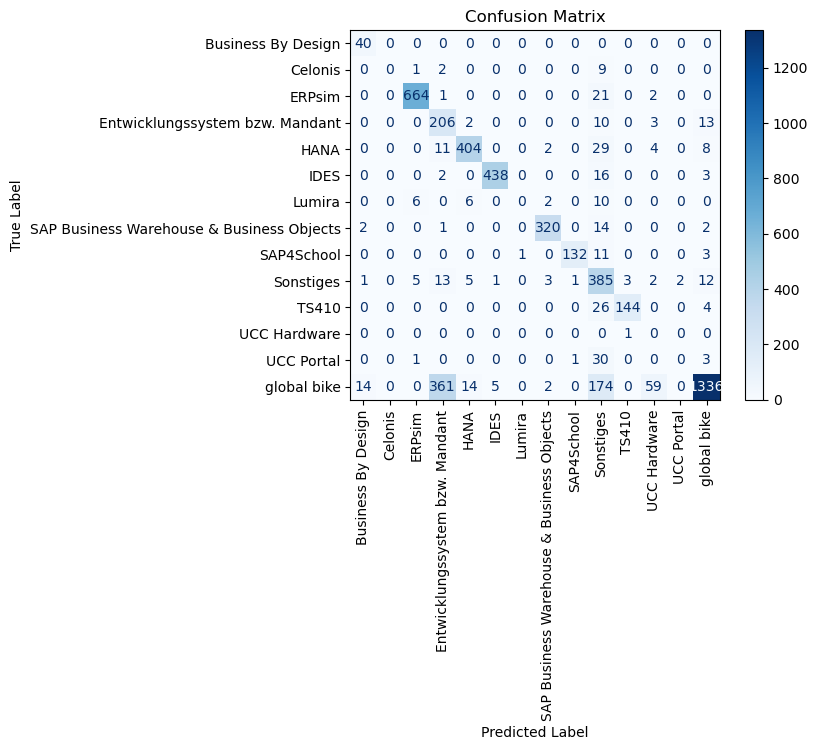

/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                           precision    recall  f1-score   support

                       Business By Design       0.70      1.00      0.82        40
                                  Celonis       0.00      0.00      0.00        12
                                   ERPsim       0.98      0.97      0.97       688
          Entwicklungssystem bzw. Mandant       0.35      0.88      0.50       234
                                     HANA       0.94      0.88      0.91       458
                                     IDES       0.99      0.95      0.97       459
                                   Lumira       0.00      0.00      0.00        24
SAP Business Warehouse & Business Objects       0.97      0.94      0.96       339
                               SAP4School       0.99      0.90      0.94       147
                                Sonstiges       0.52      0.89      0.66       433
                                    TS410       0.97      0.83      0.89       174
   

In [60]:
# 7a. Classification with confusion matrices
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from collections.abc import Sequence, Set


# Classification and evaluation in one method with different classifiers as parameter
def classify_with_metrics(classifier, X_train, y_train_tot, X_test, y_test_tot):
    clf_name = classifier.__class__.__name__

    y_train = y_train_tot['Produkt Label (Merged)']
    y_test = y_test_tot['Produkt Label (Merged)']

    # Initializing and prediction
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    y_test_tot[f'{clf_name} Predictions'] = y_pred

    # Performance evaluation
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average = 'weighted', zero_division=1)
    recall = recall_score(y_test, y_pred, average= 'weighted')
    f1_scr = f1_score(y_test, y_pred, average = 'weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)

    def merge_if_different(row):
        pred = row[f'{clf_name} Predictions']
        truth = row['Produkt Label (Merged)']
        all_preds = set([pred, truth])
        if 'New Labels' in y_test_tot.index:
            prevs = row['New Labels'].split(',')
            all_preds.update(prevs)
        return ','.join(list(all_preds))

    # y_test_tot.insert(2, f'{clf_name} Predictions', y_pred)
    y_test_tot['New Labels'] = y_test_tot.apply(merge_if_different, axis=1)

    # Worst missclassified labels
    upper_triangle = np.triu(conf_matrix, k = 1)
    worst_indices = np.unravel_index(np.argmax(upper_triangle), upper_triangle.shape)
    worst_one = worst_indices[0]
    worst_two = worst_indices[1]

    # Evaluation metrics output
    print(f'Metrics for {clf_name}')
    print('Accuracy:', accuracy)
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1-Score:', f1_scr)
    print('Biggest error betwenen:', worst_one, 'and', worst_two)
    
    # Confusion Matrix Display
    cm_display = ConfusionMatrixDisplay(conf_matrix, display_labels = np.unique(y_test))
    cm_display.plot(cmap = "Blues", values_format = "d", xticks_rotation = 'vertical')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.savefig(f"{clf_name}_confusion_matrix_global_plus_legacy.jpg", format = 'jpg', dpi = 300, bbox_inches = 'tight')
    plt.show()
    print(classification_report(y_test, y_pred))
    

# RandomForest classifier
rf_classifier = RandomForestClassifier(n_estimators = 100, random_state = 1)
classify_with_metrics(rf_classifier,final_matrix_train , y_train, final_matrix_test, y_test)

# SVM classifier
svm_classifier = SVC(kernel = 'linear', random_state = 1)
classify_with_metrics(svm_classifier, final_matrix_train, y_train, final_matrix_test, y_test)

# Naive Bayes classifier
nb_classifier = MultinomialNB()
classify_with_metrics(nb_classifier, final_matrix_train, y_train, final_matrix_test, y_test)

# LogReg 'max_iter' was increased from its default value because it threw a an erro in later execution 
# for not converging when kept at 100
# Logistic Regression classifier
logreg_classifier = LogisticRegression(random_state = 1, max_iter = 200)
classify_with_metrics(logreg_classifier, final_matrix_train, y_train, final_matrix_test, y_test)

# KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors = 5)
classify_with_metrics(knn_classifier, final_matrix_train, y_train, final_matrix_test, y_test)

# LSW: I want to see a Perceptron Approach
sgd_classifier = SGDClassifier(loss="perceptron", learning_rate="constant", eta0=0.02)
classify_with_metrics(sgd_classifier, final_matrix_train, y_train, final_matrix_test, y_test)

y_test.to_csv('~/Desktop/Tickets/multi_labelled_data.csv')

/usr/lib/python3/dist-packages/sklearn/utils/validation.py:67: FutureWarning: Pass classes=['ERPsim', 'Entwicklungssystem bzw. Mandant', 'SAP Business Warehouse & Business Objects', 'IDES', 'Business By Design', 'TS410', 'UCC Portal', 'UCC Hardware', 'SAP4School', 'HANA', 'global bike', 'Sonstiges', 'Lumira', 'Celonis'] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1464: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behav

TypeError: '>=' not supported between instances of 'str' and 'int'

In [ ]:
# LSW: Refined Classification

# Filter out rows with empty strings
only_supercategories = (ticketALL['Produkt Label'] != '') & (ticketALL['Ticket Label'] == '2. Level') & (ticketALL['Produkt Label (Merged)'] == 'global bike')
filtered_data = ticketALL[only_supercategories]

# Splitting data into training and testing sets BEFORE tfidf vectorization
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    filtered_data[['stemmed_text', 'stemmed_beschreibung'] + categorical_columns], # x
    filtered_data['Produkt Label'], # y
    test_size = 0.2,
    random_state = 1)

# Tfidf vectorization for the training set
# TEXT column
tfidf_vectorizer_text = TfidfVectorizer(max_features = 30)
tfidf_matrix_text_train = tfidf_vectorizer_text.fit_transform(X_train_raw['stemmed_text'])
# DESCRIPTION column
tfidf_vectorizer_description = TfidfVectorizer(max_features = 30)
tfidf_matrix_description_train = tfidf_vectorizer_description.fit_transform(X_train_raw['stemmed_beschreibung'])
# Combine the Tfidf train-matrices horizontally
tfidf_matrix_combined_train = hstack((tfidf_matrix_text_train, tfidf_matrix_description_train))


# Tfidf vectorization for the testing set
# TEXT and DECRIPTION column
tfidf_matrix_text_test = tfidf_vectorizer_text.transform(X_test_raw['stemmed_text'])
tfidf_matrix_description_test = tfidf_vectorizer_description.transform(X_test_raw['stemmed_beschreibung'])
# Combine the Tfidf test-matrices horizontally
tfidf_matrix_combined_test = hstack((tfidf_matrix_text_test, tfidf_matrix_description_test))


# RandomForest classifier
rf_classifier = RandomForestClassifier(n_estimators = 100, random_state = 1)
classify_with_metrics(rf_classifier, tfidf_matrix_combined_train , y_train, tfidf_matrix_combined_test, y_test)

# SVM classifier
svm_classifier = SVC(kernel = 'linear', random_state = 1)
classify_with_metrics(svm_classifier, tfidf_matrix_combined_train, y_train, tfidf_matrix_combined_test, y_test)

# Naive Bayes classifier
nb_classifier = MultinomialNB()
classify_with_metrics(nb_classifier, tfidf_matrix_combined_train, y_train, tfidf_matrix_combined_test, y_test)

# LogReg 'max_iter' was increased from its default value because it threw a an erro in later execution 
# for not converging when kept at 100
# Logistic Regression classifier
logreg_classifier = LogisticRegression(random_state = 1, max_iter = 200)
classify_with_metrics(logreg_classifier, tfidf_matrix_combined_train, y_train, tfidf_matrix_combined_test, y_test)

# KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors = 5)
classify_with_metrics(knn_classifier, tfidf_matrix_combined_train, y_train, tfidf_matrix_combined_test, y_test)

# LSW: I want to see a Perceptron Approach
sgd_classifier = SGDClassifier(loss="perceptron", learning_rate="constant", eta0=0.02)
classify_with_metrics(sgd_classifier, tfidf_matrix_combined_train, y_train, tfidf_matrix_combined_test, y_test)

: 

In [ ]:
# 7b. Classification with Comparison between algorithms

# Classify and return output (with classifier as a parameter)
def classify_with_returnValues(classifier, X_train, y_train, X_test, y_test):
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average = 'weighted', zero_division = 1)
    recall = recall_score(y_test, y_pred, average = 'weighted', zero_division = 1)
    f1_scr = f1_score(y_test, y_pred, average = 'weighted')
    return accuracy, precision, recall, f1_scr

# Dictionary with different classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(n_estimators = 100, random_state = 1),
    'SVM': SVC(kernel = 'linear', random_state = 1),
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(random_state = 1, max_iter = 200),
    'KNN': KNeighborsClassifier(n_neighbors = 5)
}

: 

In [ ]:
# 7c. Averaging out

# Dictionary metrics for each classifier and each random state
mean_metrics_dict = {classifier_name: {f'State {i}': {} for i in range(7, 17)} for classifier_name in classifiers.keys()}

# Loop
for random_state in range(7, 17):
    
    # Splitting data into training and testing sets with a different random state each time
    categorical_columns = ['Kategorie ID', 'Unterkategorie ID']

    # Filter out rows with empty strings
    non_empty_rows = (ticketALL['Produkt Label'] != '') & (ticketALL['Ticket Label'] == '2. Level')
    filtered_data = ticketALL[non_empty_rows]

    # Splitting the filtered data into training and testing sets BEFORE Tfidf vectorization
    X_train_raw, X_test_raw, y_train, y_test = train_test_split(filtered_data[['stemmed_text', 'stemmed_beschreibung'] + categorical_columns], filtered_data['Produkt Label'], test_size = 0.2, random_state = random_state)

    # Tfidf vectorization for the training set | ('Text')
    tfidf_vectorizer_text = TfidfVectorizer(max_features = 30)
    tfidf_matrix_text_train = tfidf_vectorizer_text.fit_transform(X_train_raw['stemmed_text'])
    # Tfidf vectorization for the training set | ('Description')
    tfidf_vectorizer_description = TfidfVectorizer(max_features = 30)
    tfidf_matrix_description_train = tfidf_vectorizer_description.fit_transform(X_train_raw['stemmed_beschreibung'])
    
    # Combine the Tfidf train-matrices horizontally
    tfidf_matrix_combined_train = hstack((tfidf_matrix_text_train, tfidf_matrix_description_train))

    # Tfidf vectorization for the testing set | ('Text') and ('Description')
    tfidf_matrix_text_test = tfidf_vectorizer_text.transform(X_test_raw['stemmed_text'])
    tfidf_matrix_description_test = tfidf_vectorizer_description.transform(X_test_raw['stemmed_beschreibung'])
    
    # Combine the Tfidf test-matrices horizontally
    tfidf_matrix_combined_test = hstack((tfidf_matrix_text_test, tfidf_matrix_description_test))
    
    # One-hot encoding for categorical data
    encoder = OneHotEncoder(handle_unknown = 'ignore')
    encoded_data_train = encoder.fit_transform(X_train_raw[categorical_columns]).toarray()
    encoded_data_test = encoder.transform(X_test_raw[categorical_columns]).toarray()

    # Convert the one hot encoded arrays to sparse matrices
    encoded_sparse_train = scipy.sparse.csr_matrix(encoded_data_train)
    encoded_sparse_test = scipy.sparse.csr_matrix(encoded_data_test)

    # Combine Tfidf matrix and one hot encoded matrix horizontally for both training and testing sets
    final_matrix_train = hstack((tfidf_matrix_combined_train, encoded_sparse_train))
    final_matrix_test = hstack((tfidf_matrix_combined_test, encoded_sparse_test))
    

    # Evaluate and store metrics for each classifier
    for classifier_name, classifier in classifiers.items():
        accuracy, precision, recall, f1_scr = classify_with_returnValues(classifier, final_matrix_train, y_train, final_matrix_test, y_test)
        mean_metrics_dict[classifier_name][f'State {random_state}']['Accuracy'] = accuracy
        mean_metrics_dict[classifier_name][f'State {random_state}']['Precision'] = precision
        mean_metrics_dict[classifier_name][f'State {random_state}']['Recall'] = recall
        mean_metrics_dict[classifier_name][f'State {random_state}']['F1-Score'] = f1_scr


# Mean metrics for each algorithm
for classifier_name, classifier_metrics in mean_metrics_dict.items():
    print(f'\nMean Metrics for {classifier_name}:')
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
    for metric_name in metrics:
        metric_values = [classifier_metrics[state][metric_name] for state in classifier_metrics.keys()]
        mean_metric = np.mean(metric_values)
        print(f"{metric_name}: {mean_metric:.4f}")                             

: 

In [ ]:
# Visualizing the mean metrics of the different algorithms
import seaborn as sns

# Extracting metric names and values for chart plotting
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
classifier_names = list(mean_metrics_dict.keys())

# Extract mean metric values for each classifier
values = [[np.mean([mean_metrics_dict[classifier_name][f'State {state}'][metric] for state in range(7, 17)]) 
           for metric in metrics] for classifier_name in classifier_names]

# Plotting the bar chart
bar_width = 0.15
index = np.arange(len(metrics))
fig, chart = plt.subplots(figsize=(12, 8))
colors = sns.color_palette("mako", n_colors = len(classifier_names))
bars = [chart.bar(index + i * bar_width, values[i], width = bar_width, label = classifier_names[i], color =colors[i]) 
        for i in range(len(classifier_names))]

# Labels and title
chart.set_xlabel('Metrics')
chart.set_ylabel('Score')
chart.set_title('Comparison of mean classification metrics')
chart.set_xticks(index + 2 * bar_width)
chart.set_xticklabels(metrics)

# Adding percentages on top of each bar
def add_percentages(bars):
    for bar_set in bars:
        for bar in bar_set:
            height = bar.get_height()
            chart.annotate('{:.1%}'.format(height),
                        xy = (bar.get_x() + bar.get_width() / 2, height),
                        xytext = (0, 3),
                        textcoords = 'offset points',
                        ha ='center', va = 'bottom', fontsize = 9)

add_percentages(bars)
chart.legend()
#plt.savefig('comparison_baseline.jpg', format = 'jpg', dpi = 300)
plt.show()

: 